In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("avocado.csv")

In [3]:
data.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [4]:
data.shape

(18249, 14)

In [5]:
data.drop(data.columns[0], axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


# Visualization

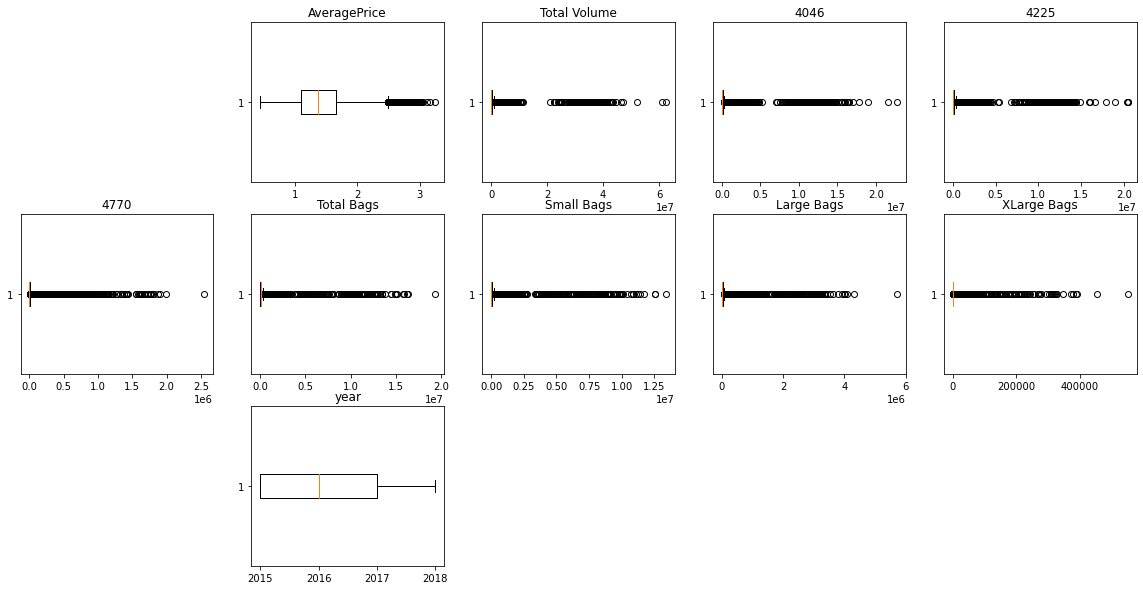

In [7]:
plt.figure(figsize=(20, 10))

for i in range(len(data.columns)):
    if data.dtypes[i] != 'object':
        plt.subplot(3, 5, i + 1)
        plt.boxplot(data[data.columns[i]], vert=False)
        plt.title(data.columns[i])
        
plt.show()

In [8]:
data.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Encoding

In [9]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

In [10]:
categorical_columns = ['region', 'Date', 'type']

get_uniques(data, categorical_columns)

{'region': ['Albany',
  'Atlanta',
  'BaltimoreWashington',
  'Boise',
  'Boston',
  'BuffaloRochester',
  'California',
  'Charlotte',
  'Chicago',
  'CincinnatiDayton',
  'Columbus',
  'DallasFtWorth',
  'Denver',
  'Detroit',
  'GrandRapids',
  'GreatLakes',
  'HarrisburgScranton',
  'HartfordSpringfield',
  'Houston',
  'Indianapolis',
  'Jacksonville',
  'LasVegas',
  'LosAngeles',
  'Louisville',
  'MiamiFtLauderdale',
  'Midsouth',
  'Nashville',
  'NewOrleansMobile',
  'NewYork',
  'Northeast',
  'NorthernNewEngland',
  'Orlando',
  'Philadelphia',
  'PhoenixTucson',
  'Pittsburgh',
  'Plains',
  'Portland',
  'RaleighGreensboro',
  'RichmondNorfolk',
  'Roanoke',
  'Sacramento',
  'SanDiego',
  'SanFrancisco',
  'Seattle',
  'SouthCarolina',
  'SouthCentral',
  'Southeast',
  'Spokane',
  'StLouis',
  'Syracuse',
  'Tampa',
  'TotalUS',
  'West',
  'WestTexNewMexico'],
 'Date': ['2015-12-27',
  '2015-12-20',
  '2015-12-13',
  '2015-12-06',
  '2015-11-29',
  '2015-11-22',
  '20

In [11]:
ordinal_features = ['Date']

nominal_features = ['region']

target_column = 'type'

In [12]:
date_ordering = sorted(data['Date'].unique())

In [13]:
def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

In [14]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)
    return df

In [15]:
data = ordinal_encode(data, 'Date', date_ordering)

In [16]:
data = onehot_encode(data, 'region')

In [17]:
data.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,0,0,0,0,0,0,0,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,0,0,0,0,0,0,0,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,0,0,0,0,0,0,0,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,0,0,0,0,0,0,0,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,0,0,0,0,0,0,0,0,0,0
5,46,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,...,0,0,0,0,0,0,0,0,0,0
6,45,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,...,0,0,0,0,0,0,0,0,0,0
7,44,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,...,0,0,0,0,0,0,0,0,0,0
8,43,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,...,0,0,0,0,0,0,0,0,0,0
9,42,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
label_encoder = LabelEncoder()

data[target_column] = label_encoder.fit_transform(data[target_column])

# Splitting and Scaling

In [19]:
y = data[target_column]
X = data.drop(target_column, axis=1)

In [20]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [21]:
y.shape

(18249,)

In [22]:
X.shape

(18249, 65)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [28]:

model = LogisticRegression()
classify(model, X, y)

Accuracy is 99.05763751917598
Cross validation is 98.41632423219723


In [29]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 99.80276134122288
Cross validation is 98.356024731865


In [30]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 99.93425378040762
Cross validation is 99.02999583297358


In [31]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 100.0
Cross validation is 99.835604425307


In [32]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 95.5511724742494
Cross validation is 94.69003104622396


# Confusion Matrix
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made

In [47]:
model = RandomForestClassifier()
model.fit(X_train,y_train)


RandomForestClassifier()

In [37]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[2746,    1],
       [   2, 2726]], dtype=int64)

# saving the model

In [48]:
import joblib
joblib.dump(model,"Avocado.pkl")

['Avocado.pkl']